<a href="https://colab.research.google.com/github/chrisburnham/digit_reconition/blob/master/Copy_of_digit_reconition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train dense matrix shape (60000, 784)
Test dense matrix shape (10000, 784)
Train conv matrix shape (60000, 28, 28, 1)
Test conv matrix shape (10000, 28, 28, 1)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 10s - loss: 0.2514 - acc: 0.9236 - val_loss: 0.1054 - val_acc: 0.9654
Epoch 2/20
 - 9s - loss: 0.0995 - acc: 0.9694 - val_loss: 0.0824 - val_acc: 0.9739
Epoch 3/20
 - 9s - loss: 0.0720 - acc: 0.9769 - val_loss: 0.0694 - val_acc: 0.9763
Epoch 4/20
 - 9s - loss: 0.0580 - acc: 0.9807 - val_loss: 0.0689 - val_acc: 0.9783
Epoch 5/20
 - 9s - loss: 0.0446 - acc: 0.9854 - val_loss: 0.0649 - val_acc: 0.9815
Epoch 6/20
 - 9s - loss: 0.0382 - acc: 0.9873 - val_loss: 0.0728 - val_acc: 0.9785
Epoch 7/20
 - 9s - loss: 0.0350 - acc: 0.9879 - val_loss: 0.0634 - val_acc: 0.9815
Epoch 8/20
 - 9s - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0688 - val_acc: 0.9798
Epoch 9/20
 - 9s - loss: 0.0248 - acc: 0.

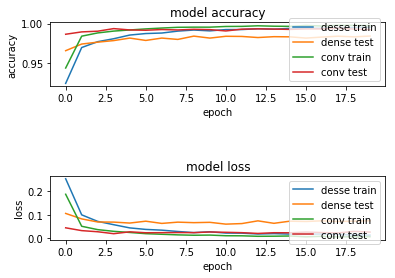

In [8]:
# Using https://nextjournal.com/gkoehler/digit-recognition-with-keras
# As a starting off point example

# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D, Flatten
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train_dense = X_train.reshape(60000, 784)
X_test_dense = X_test.reshape(10000, 784)

# Adding dimension for convolution
X_train_conv = np.expand_dims(X_train, axis=3)
X_test_conv = np.expand_dims(X_test, axis=3)

# Making types consistent
X_train_dense = X_train_dense.astype('float32')
X_test_dense = X_test_dense.astype('float32')
X_train_conv = X_train_conv.astype('float32')
X_test_conv = X_test_conv.astype('float32')


# normalizing the data to help with the training
X_train_dense /= 255
X_test_dense /= 255
X_train_conv /= 255
X_test_conv /= 255

# print the final input shape ready for training
print("Train dense matrix shape", X_train_dense.shape)
print("Test dense matrix shape", X_test_dense.shape)
print("Train conv matrix shape", X_train_conv.shape)
print("Test conv matrix shape", X_test_conv.shape)

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
# Model section to do it without convolution
model_dense = Sequential()
model_dense.add(Dense(512, input_shape=(784,)))
model_dense.add(Activation('relu'))                            
model_dense.add(Dropout(0.2))

model_dense.add(Dense(512))
model_dense.add(Activation('relu'))
model_dense.add(Dropout(0.2))

model_dense.add(Dense(10))
model_dense.add(Activation('softmax'))


# Convolution model
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                activation='relu', input_shape=(28, 28, 1)))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Dropout(0.2))

model_conv.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_conv.add(Dropout(0.2))

model_conv.add(Flatten())
model_conv.add(Dense(512, activation='relu'))

model_conv.add(Dense(10))
model_conv.add(Activation('softmax'))

# compiling the sequential models
model_dense.compile(loss='categorical_crossentropy', 
                    metrics=['accuracy'], 
                    optimizer='adam')

model_conv.compile(loss='categorical_crossentropy', 
                   metrics=['accuracy'], 
                   optimizer='adam')


# training the model and saving metrics in history
history_dense = model_dense.fit(X_train_dense, Y_train,
                                batch_size=128, epochs=20,
                                verbose=2,
                                validation_data=(X_test_dense, Y_test))

# training the model and saving metrics in history
history_conv = model_conv.fit(X_train_conv, Y_train,
                              batch_size=128, epochs=20,
                              verbose=2,
                              validation_data=(X_test_conv, Y_test))

# plotting the metrics
fig = plt.figure()
plt.subplot(3,1,1)
plt.plot(history_dense.history['acc'])
plt.plot(history_dense.history['val_acc'])
plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['desse train', 'dense test', 'conv train', 'conv test'], 
           loc='lower right')

plt.subplot(3,1,3)
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['desse train', 'dense test', 'conv train', 'conv test'], 
           loc='upper right')

fig